In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.__version__

'0.12.2'

In [4]:
Data = pd.read_csv("/Users/somyagarg/Desktop/Automated Trading System/RELIANCE.NS.csv")

In [5]:
print(Data.head())

         Date         Open         High          Low        Close  \
0  2019-05-29  1207.833496  1219.079834  1192.427002  1200.564575   
1  2019-05-30  1203.490479  1227.034546  1203.490479  1215.833984   
2  2019-05-31  1223.285767  1226.943115  1207.102051  1216.199707   
3  2019-06-03  1220.634155  1250.121460  1208.016357  1243.675415   
4  2019-06-04  1241.160889  1256.521729  1232.611938  1235.857788   

     Adj Close    Volume  
0  1176.427612   7779257  
1  1191.390015  11747190  
2  1191.748413  12862033  
3  1218.671753   9278471  
4  1211.011230   7721380  


In [6]:
print(Data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [7]:
print(Data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
duplicate_rows = Data.duplicated()
print(duplicate_rows.sum())

0


In [9]:
df = pd.DataFrame(Data)

In [10]:
rows, col = df.shape
print ("Dimensions of dataset: {}" . format (df.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (1236, 7)
Rows: 1236 
Columns: 7


In [11]:
print(f'The data type contains:\n object --> {df.dtypes.value_counts()[1]}\n int64 --> {df.dtypes.value_counts()[2]}\n float64 --> {df.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 int64 --> 1
 float64 --> 5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [13]:
df2=df.copy()

In [14]:
float_cols = df.columns.drop(["Date"])
df2[float_cols] = df[float_cols].round().astype("Int64")
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-29,1208,1219,1192,1201,1176,7779257
1,2019-05-30,1203,1227,1203,1216,1191,11747190
2,2019-05-31,1223,1227,1207,1216,1192,12862033
3,2019-06-03,1221,1250,1208,1244,1219,9278471
4,2019-06-04,1241,1257,1233,1236,1211,7721380


In [15]:
print(f'The data type contains:\n object --> {df2.dtypes.value_counts()[1]}\n int64 --> {df2.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 int64 --> 6


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1236 non-null   object
 1   Open       1236 non-null   Int64 
 2   High       1236 non-null   Int64 
 3   Low        1236 non-null   Int64 
 4   Close      1236 non-null   Int64 
 5   Adj Close  1236 non-null   Int64 
 6   Volume     1236 non-null   Int64 
dtypes: Int64(6), object(1)
memory usage: 75.0+ KB


In [17]:
df2['Date'] = pd.to_datetime(df2['Date'], utc=True)   
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       1236 non-null   datetime64[ns, UTC]
 1   Open       1236 non-null   Int64              
 2   High       1236 non-null   Int64              
 3   Low        1236 non-null   Int64              
 4   Close      1236 non-null   Int64              
 5   Adj Close  1236 non-null   Int64              
 6   Volume     1236 non-null   Int64              
dtypes: Int64(6), datetime64[ns, UTC](1)
memory usage: 75.0 KB


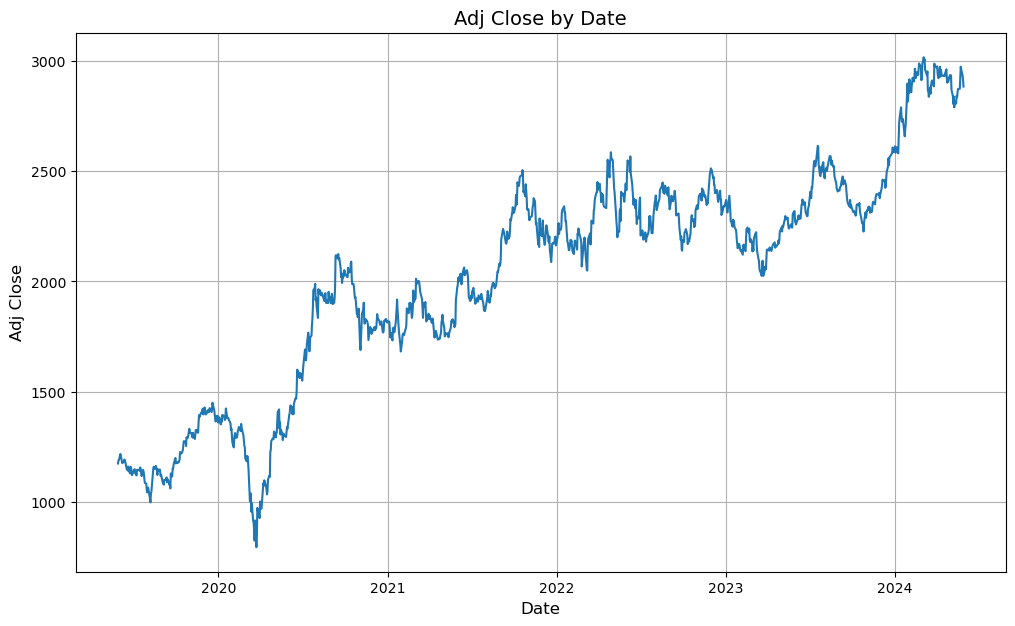

In [18]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df2, x="Date", y="Adj Close")
plt.title("Adj Close by Date", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adj Close", fontsize=12)
plt.grid(True)
plt.show()

In [32]:
df2['20_day_MA'] = df2['Adj Close'].rolling(window=20).mean()
df2['50_day_MA'] = df2['Adj Close'].rolling(window=50).mean()

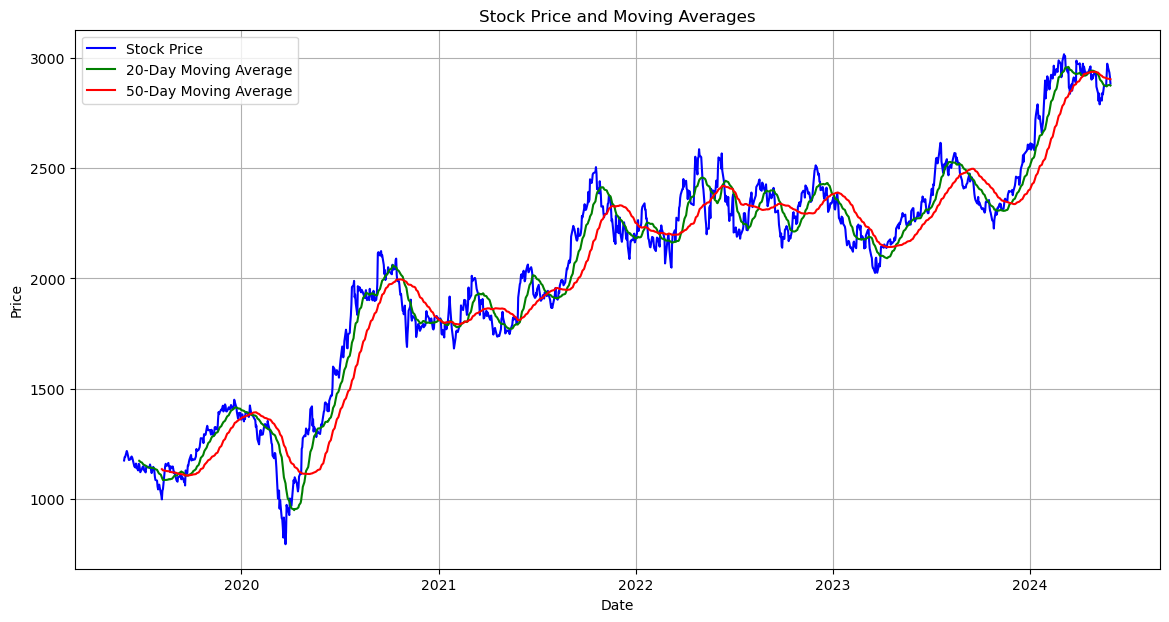

In [20]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df2, x="Date", y="Adj Close",label='Stock Price', color='blue')
sns.lineplot(data=df2, x="Date", y="20_day_MA" ,label='20-Day Moving Average', color='green')
sns.lineplot(data=df2, x="Date", y="50_day_MA",label='50-Day Moving Average', color='red')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

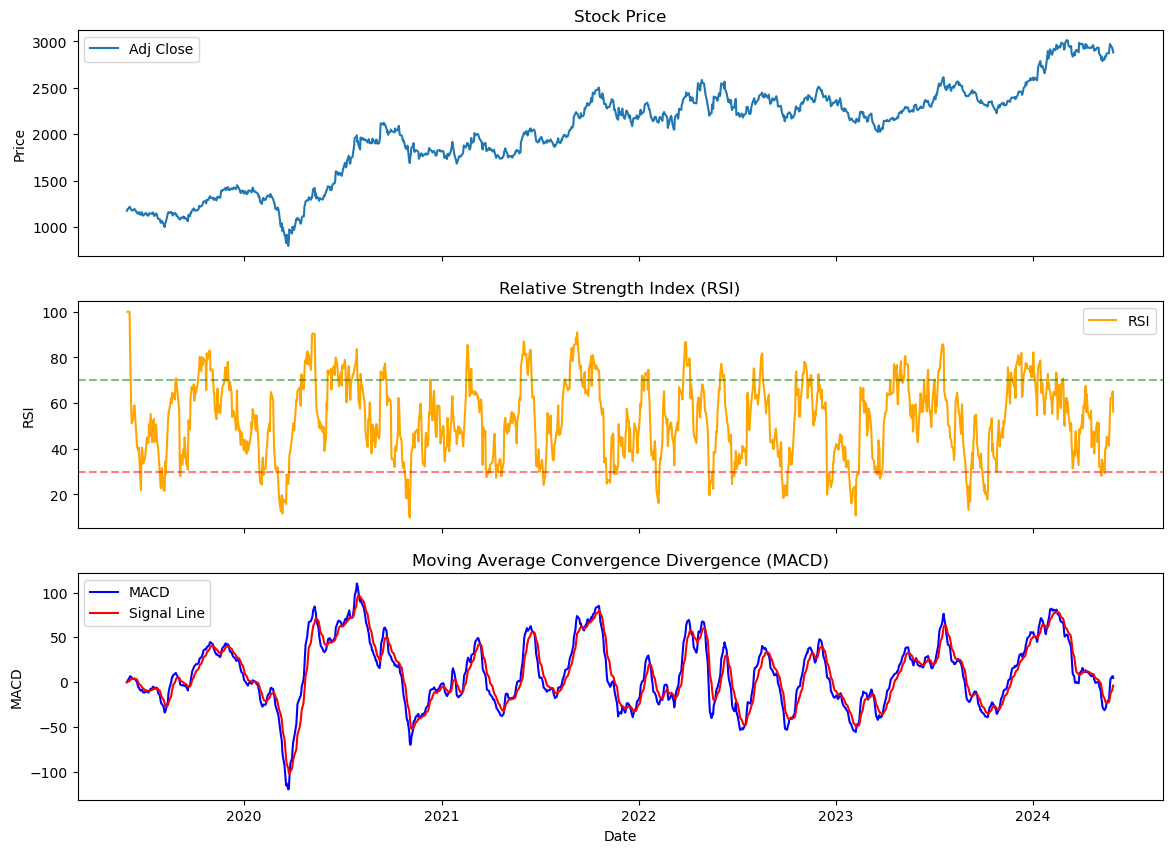

In [63]:
def calculate_RSI(df, period=14):
    delta = df['Adj Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    df['RSI'] = rsi
    return df

def calculate_MACD(df):
    short_ema = df['Adj Close'].ewm(span=12, adjust=False).mean()
    long_ema = df['Adj Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = (short_ema - long_ema)
    df['Signal Line'] = (df['MACD'].ewm(span=9, adjust=False).mean())
    return df

def plot_stock_data(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 10), sharex=True)
    
    # Plotting the Adjusted Close Price
    ax1.plot(df['Date'], df['Adj Close'], label='Adj Close')
    ax1.set_title('Stock Price')
    ax1.set_ylabel('Price')
    ax1.legend()
    
    # Plotting the RSI
    ax2.plot(df['Date'], df['RSI'], label='RSI', color='orange')
    ax2.set_title('Relative Strength Index (RSI)')
    ax2.axhline(30, linestyle='--', alpha=0.5, color='red')
    ax2.axhline(70, linestyle='--', alpha=0.5, color='green')
    ax2.set_ylabel('RSI')
    ax2.legend()
    
    # Plotting the MACD
    ax3.plot(df['Date'], df['MACD'], label='MACD', color='blue')
    ax3.plot(df['Date'], df['Signal Line'], label='Signal Line', color='red')
    ax3.set_title('Moving Average Convergence Divergence (MACD)')
    ax3.set_ylabel('MACD')
    ax3.legend()
    
    plt.xlabel('Date')
    plt.show()

# Assuming df2 is your DataFrame containing 'Date' and 'Adj Close'
# Example usage
# df2 = pd.read_csv('your_stock_data.csv')
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = calculate_RSI(df2)
df2 = calculate_MACD(df2)
plot_stock_data(df2)

/var/folders/b1/vvxbv45d541_xr3qbc6hbxwh0000gn/T/ipykernel_1423/2498424690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['signal'][short_ma > long_ma] = 1
/var/folders/b1/vvxbv45d541_xr3qbc6hbxwh0000gn/T/ipykernel_1423/2498424690.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['signal'][short_ma <= long_ma] = 0


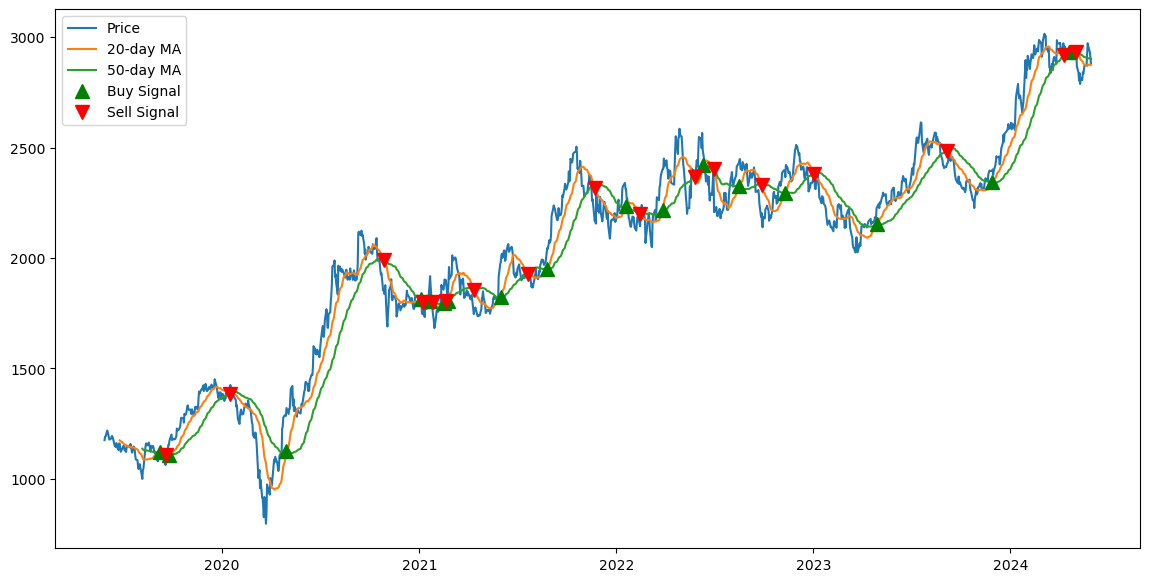

In [50]:
def backtest_strategy(prices, short_ma, long_ma):
    signals = pd.DataFrame(index=prices.index)
    signals['price'] = prices
    signals['short_ma'] = short_ma
    signals['long_ma'] = long_ma
    signals['signal'] = 0
    signals['signal'][short_ma > long_ma] = 1
    signals['signal'][short_ma <= long_ma] = 0
    signals['positions'] = signals['signal'].diff()
    return signals

prices=df2['Adj Close']
short_ma=df2['20_day_MA']
long_ma=df2['50_day_MA']
date2=df2['Date']
signals = backtest_strategy(prices, short_ma, long_ma)
signals['date']=date2

def plot_signals(signals):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(14, 7))
    plt.plot(signals['date'], signals['price'], label='Price')
    plt.plot(signals['date'], signals['short_ma'], label='20-day MA')
    plt.plot(signals['date'], signals['long_ma'], label='50-day MA')
    plt.plot(signals.loc[signals['positions'] == 1, 'date'], 
             signals['short_ma'][signals['positions'] == 1], '^', 
             markersize=10, color='g', lw=0, label='Buy Signal')
    plt.plot(signals.loc[signals['positions'] == -1, 'date'], 
             signals['short_ma'][signals['positions'] == -1], 'v', 
             markersize=10, color='r', lw=0, label='Sell Signal')
    plt.legend()
    plt.show()

    
plot_signals(signals)

In [62]:
import math
def calculate_total_returns(signals):
    initial_capital = 100000  # Starting with 100,000 in capital
    position = 0  # Initially not holding any stock
    total_returns = 0  # Total returns initialization
    gross_profit=0
    gross_loss=0

    for i in range(1, len(signals)):
        if signals['positions'].iloc[i] == 1:  # Buy signal
            buy_price = signals['price'].iloc[i]
            position = initial_capital // buy_price  # Number of shares bought
            print(f"No of Stocks bought: {position} at {buy_price}")
            initial_capital = initial_capital % buy_price  # All capital is now in the position

        elif signals['positions'].iloc[i] == -1 and position > 0:  # Sell signal
            sell_price = signals['price'].iloc[i]
            initial_capital = initial_capital + position * sell_price  # Liquidate the position
            trade_return = (sell_price-buy_price)*position  # Calculate the return from the trade
            if trade_return>=0:
                gross_profit+=trade_return
            else:
                gross_loss+=trade_return
            total_returns += trade_return
            position = 0  # No position after selling
            percent_returns =format(math.log(sell_price/buy_price)*100,".2f")
            print("%Return from the Trade: {}%".format(percent_returns))
            print(f"Selling at {sell_price}, Trade Return: {trade_return}")
            print(f"Final Capital after the trade: {initial_capital}\n")

    # If still holding position, liquidate at the last price
    if position > 0:
        final_price = signals['price'].iloc[-1]
        initial_capital = initial_capital + position * final_price
        trade_return = (buy_price-final_price)*position
        total_returns += trade_return
        print(f"Final liquidation at {final_price}, Trade Return: {trade_return}")

    print(f"Total Returns: {total_returns}")
    print(f"Total Capital: {initial_capital}")
    print("Profit Factor: ",-gross_profit/gross_loss)
    return total_returns

# Assuming df2 already contains the moving averages as '20_day_MA' and '50_day_MA'
prices = df2['Adj Close']
short_ma = df2['20_day_MA']
long_ma = df2['50_day_MA']
signals = backtest_strategy(prices, short_ma, long_ma)
total_returns = calculate_total_returns(signals)

# The total_returns variable now contains the total profit or loss from the strategy


No of Stocks bought: 90 at 1102
%Return from the Trade: 2.60%
Selling at 1131, Trade Return: 2610
Final Capital after the trade: 102610

No of Stocks bought: 88 at 1153
%Return from the Trade: 21.18%
Selling at 1425, Trade Return: 23936
Final Capital after the trade: 126546

No of Stocks bought: 95 at 1321
%Return from the Trade: 33.03%
Selling at 1838, Trade Return: 49115
Final Capital after the trade: 175661

No of Stocks bought: 96 at 1819
%Return from the Trade: -2.90%
Selling at 1767, Trade Return: -4992
Final Capital after the trade: 170669

No of Stocks bought: 88 at 1918
%Return from the Trade: -10.26%
Selling at 1731, Trade Return: -16456
Final Capital after the trade: 154213

No of Stocks bought: 83 at 1857
%Return from the Trade: 2.34%
Selling at 1901, Trade Return: 3652
Final Capital after the trade: 157865

No of Stocks bought: 85 at 1849
%Return from the Trade: -5.73%
Selling at 1746, Trade Return: -8755
Final Capital after the trade: 149110

No of Stocks bought: 74 at 20

/var/folders/b1/vvxbv45d541_xr3qbc6hbxwh0000gn/T/ipykernel_1423/4028493764.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['signal'][short_ma > long_ma] = 1
/var/folders/b1/vvxbv45d541_xr3qbc6hbxwh0000gn/T/ipykernel_1423/4028493764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['signal'][short_ma <= long_ma] = 0


/var/folders/b1/vvxbv45d541_xr3qbc6hbxwh0000gn/T/ipykernel_1423/4028493764.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['signal'][short_ma > long_ma] = 1
/var/folders/b1/vvxbv45d541_xr3qbc6hbxwh0000gn/T/ipykernel_1423/4028493764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['signal'][short_ma <= long_ma] = 0


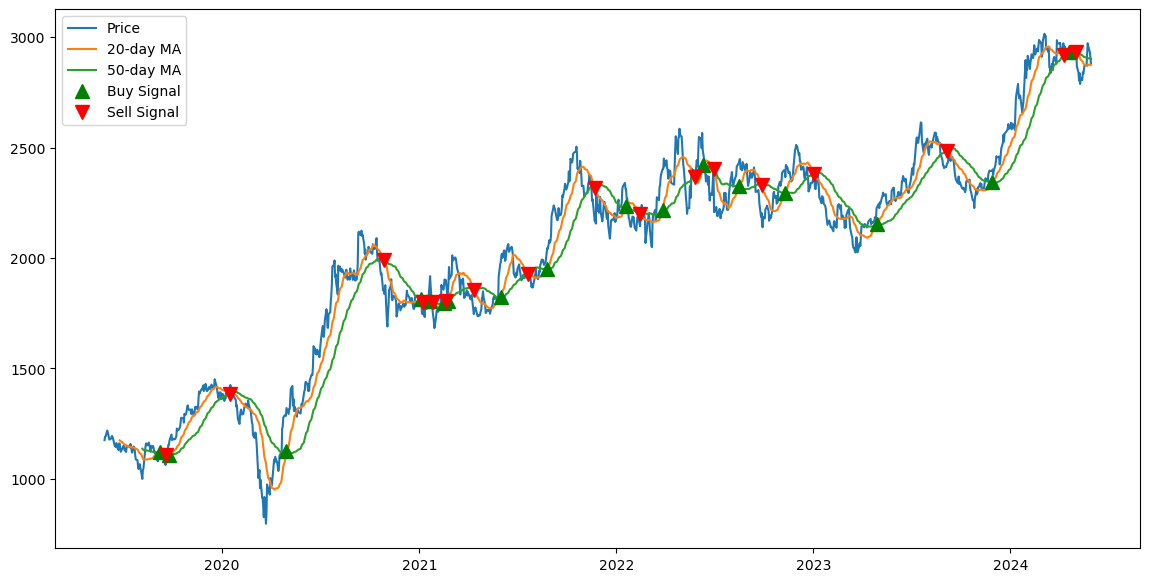

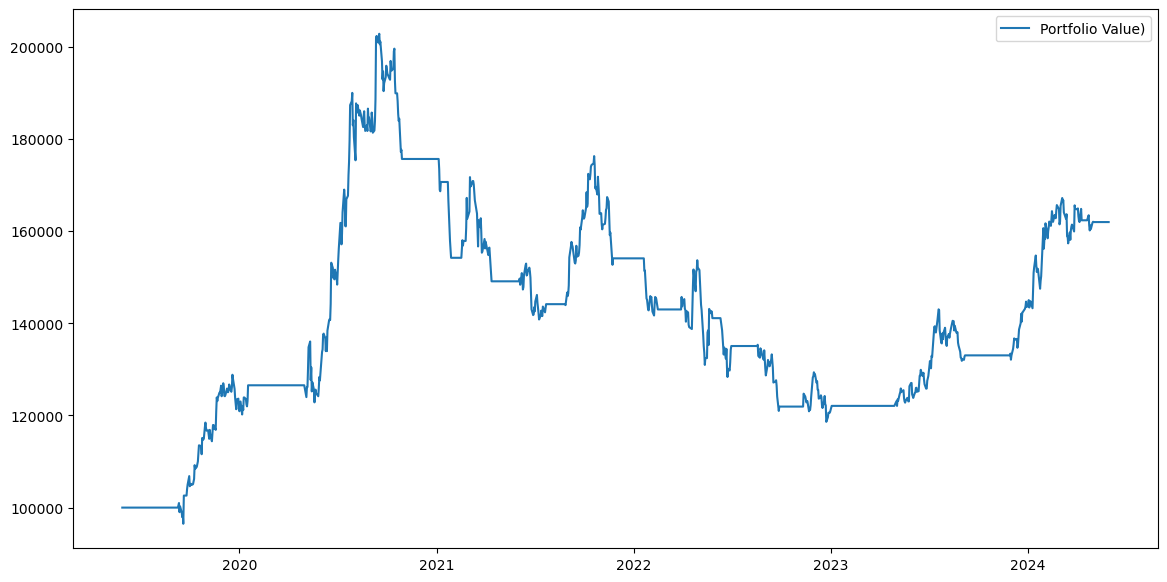

In [61]:
def backtest_strategy(prices, short_ma, long_ma):
    signals = pd.DataFrame(index=prices.index)
    signals['price'] = prices
    signals['short_ma'] = short_ma
    signals['long_ma'] = long_ma
    signals['signal'] = 0
    signals['signal'][short_ma > long_ma] = 1
    signals['signal'][short_ma <= long_ma] = 0
    signals['positions'] = signals['signal'].diff()
    return signals

# Function to calculate total returns
def calculate_total_returns(signals):
    initial_capital = 100000  # Starting with 100,000 in capital
    position = 0  # Initially not holding any stock
    equity = [initial_capital]  # List to track equity over time

    for i in range(1, len(signals)):
        if signals['positions'].iloc[i] == 1:  # Buy signal
            buy_price = signals['price'].iloc[i]
            position = initial_capital // buy_price  # Number of shares bought
            initial_capital = initial_capital % buy_price  # All capital is now in the position
        elif signals['positions'].iloc[i] == -1 and position > 0:  # Sell signal
            sell_price = signals['price'].iloc[i]
            initial_capital = initial_capital + position * sell_price  # Liquidate the position
            position = 0  # No position after selling

        # Update equity considering current position
        current_equity = initial_capital + position * signals['price'].iloc[i]
        equity.append(current_equity)

    # If still holding position, liquidate at the last price
    if position > 0:
        final_price = signals['price'].iloc[-1]
        initial_capital = initial_capital + position * final_price
        equity[-1] = initial_capital  # Update the last equity value

    signals['equity'] = equity  # Add equity curve to the signals DataFrame
    return signals

# Function to plot signals
def plot_signals(signals):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(14, 7))
    plt.plot(signals['date'], signals['price'], label='Price')
    plt.plot(signals['date'], signals['short_ma'], label='20-day MA')
    plt.plot(signals['date'], signals['long_ma'], label='50-day MA')
    plt.plot(signals.loc[signals['positions'] == 1, 'date'], 
             signals['short_ma'][signals['positions'] == 1], '^', 
             markersize=10, color='g', lw=0, label='Buy Signal')
    plt.plot(signals.loc[signals['positions'] == -1, 'date'], 
             signals['short_ma'][signals['positions'] == -1], 'v', 
             markersize=10, color='r', lw=0, label='Sell Signal')
    plt.legend()
    plt.show()

# Function to plot total returns
def plot_total_returns(signals):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(14, 7))
    plt.plot(signals['date'], signals['equity'], label='Portfolio Value)')
    plt.legend()
    plt.show()

# Data for backtesting
prices = df2['Adj Close']
short_ma = df2['20_day_MA']
long_ma = df2['50_day_MA']
date2 = df2['Date']

# Generate signals
signals = backtest_strategy(prices, short_ma, long_ma)
signals['date'] = date2

# Calculate total returns
signals = calculate_total_returns(signals)

# Plot the signals
plot_signals(signals)

# Plot total returns
plot_total_returns(signals)